In [37]:
import pandas as pd
%pylab inline

import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Populating the interactive namespace from numpy and matplotlib


Load dataset and remove url and extract shares

In [38]:
df=pd.read_csv("OnlineNewsPopularity.csv")
df = df.rename(columns = {
       'url': ' url'  
    })
df.rename(columns=lambda x: x[1:], inplace=True)
y = df.pop('shares')

del df['url']

Visualise dataset and labels

In [43]:
print("Dataframe shape: {0}".format(df.shape))
print("Labels shape: {0}".format(y.shape))
df.columns

Dataframe shape: (39644, 59)
Labels shape: (39644,)


Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'glob

In [40]:
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=.2)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

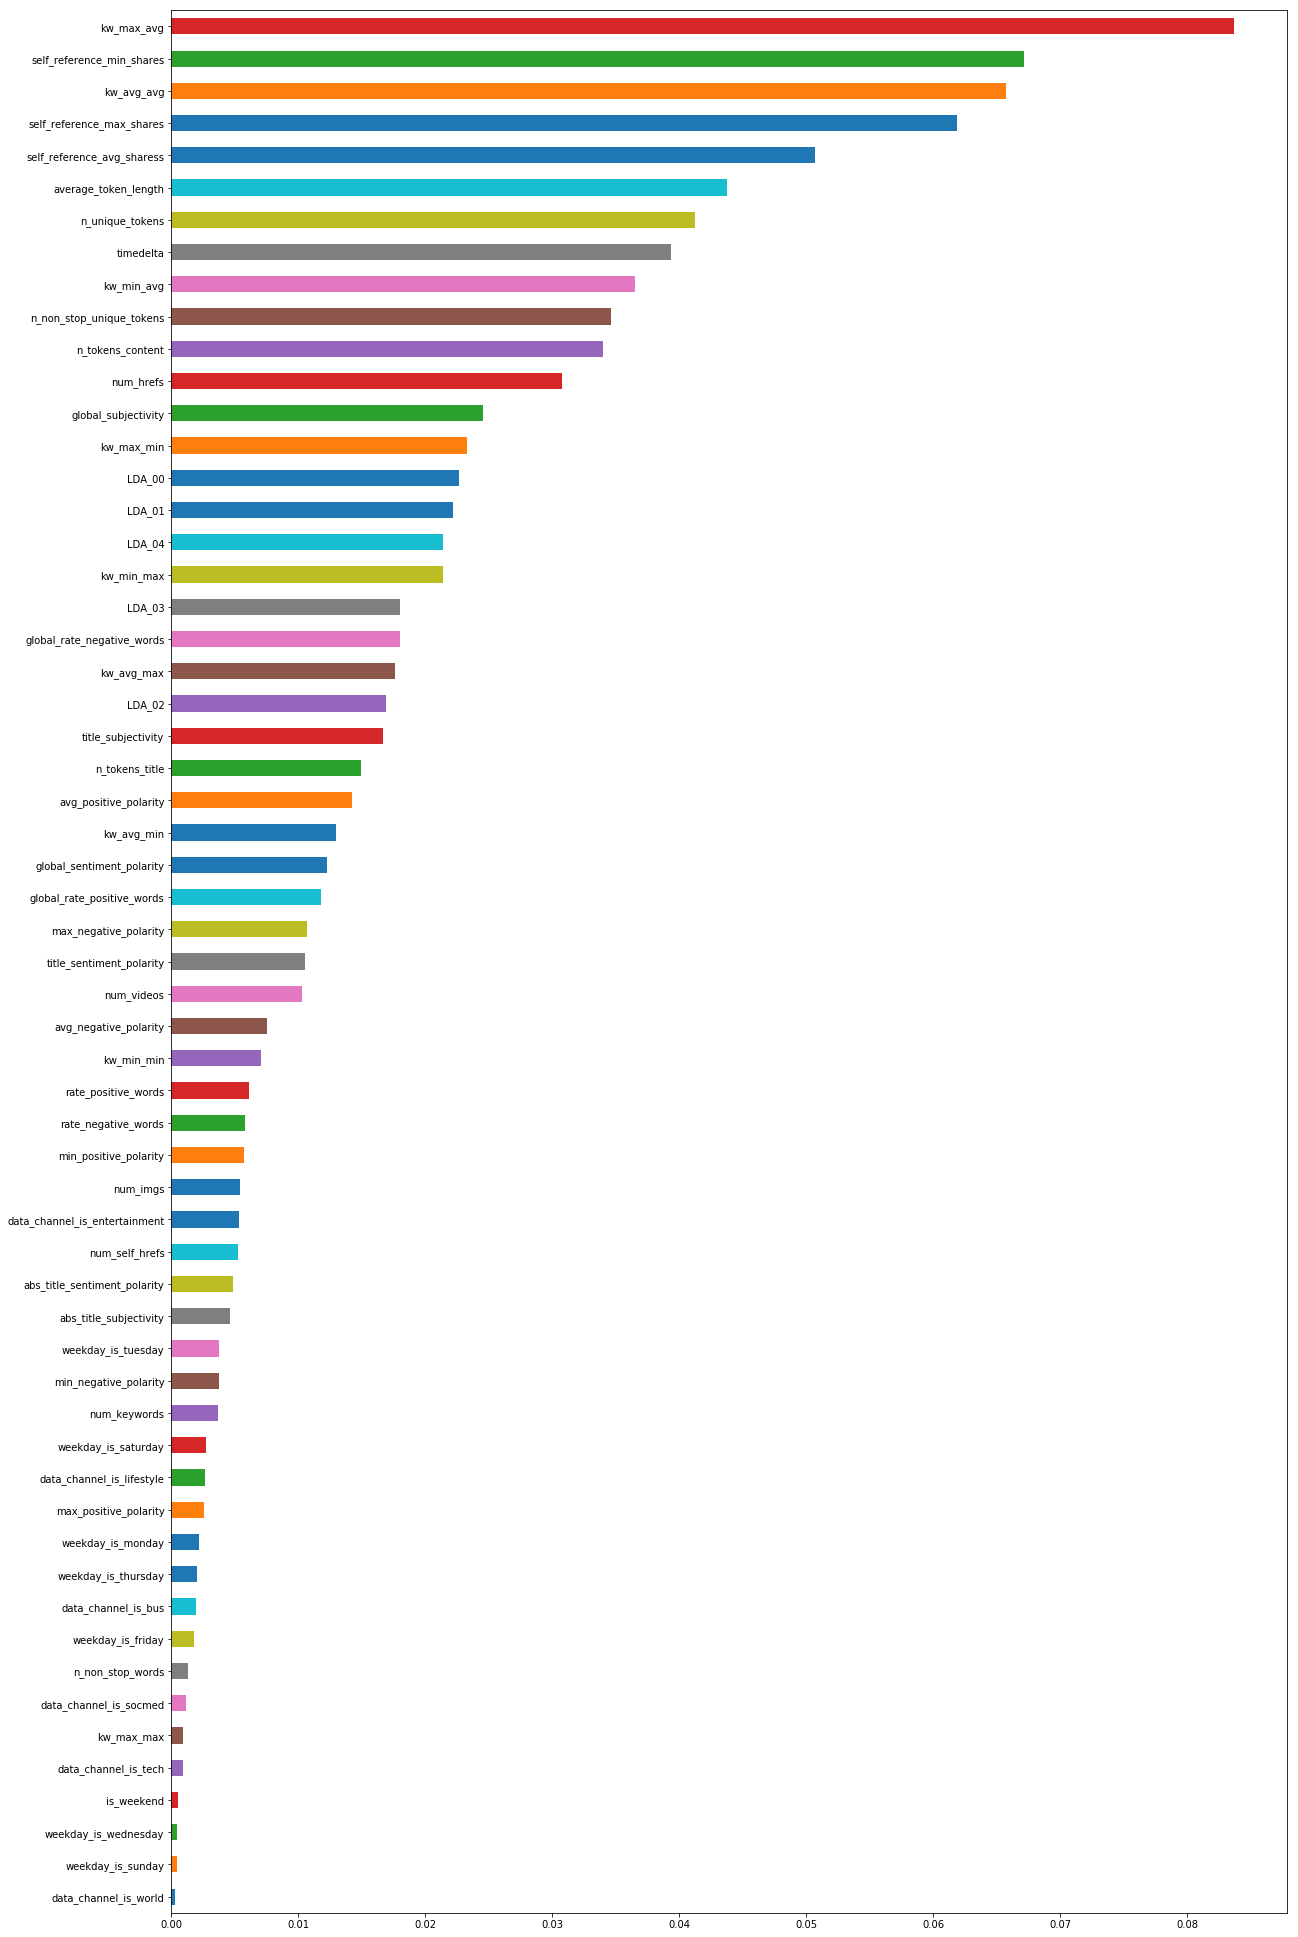

In [41]:
feature_importances = pd.Series(model.feature_importances_, index=df.columns)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind="barh", figsize=(20,35))

Visualise top 30 features

In [53]:
feat_importances = feature_importances.iloc[::-1]
feat_importances[:30]

kw_max_avg                    0.083694
self_reference_min_shares     0.067155
kw_avg_avg                    0.065731
self_reference_max_shares     0.061884
self_reference_avg_sharess    0.050694
average_token_length          0.043743
n_unique_tokens               0.041204
timedelta                     0.039335
kw_min_avg                    0.036520
n_non_stop_unique_tokens      0.034581
n_tokens_content              0.033962
num_hrefs                     0.030732
global_subjectivity           0.024539
kw_max_min                    0.023276
LDA_00                        0.022651
LDA_01                        0.022202
LDA_04                        0.021393
kw_min_max                    0.021348
LDA_03                        0.017997
global_rate_negative_words    0.017975
kw_avg_max                    0.017613
LDA_02                        0.016931
title_subjectivity            0.016626
n_tokens_title                0.014941
avg_positive_polarity         0.014245
kw_avg_min               